In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from pmdarima import auto_arima

In [3]:
boroughs = pd.read_excel('data/boroughs.xlsx')

display(boroughs)

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,354709,606006,410002,558093,529749,792454,393479,572575,480183,472599,...,618798,405808,476764,785086,607299,452726,470209,533922,695867,889935


In [5]:
# Get the 5 most expensive and 5 cheapest boroughs
boroughs_row = boroughs.iloc[0]  # Get the first (and only) row

# Convert to DataFrame and sort by values
boroughs_df = boroughs_row.reset_index()
boroughs_df.columns = ['Borough', 'Price']
boroughs_df = boroughs_df.sort_values('Price', ascending=False)

# Get 5 most expensive and 5 cheapest
most_expensive = boroughs_df.head(5)
cheapest = boroughs_df.tail(5)

print("5 Most Expensive Boroughs:")
display(most_expensive)

print("\n5 Cheapest Boroughs:")
display(cheapest)

5 Most Expensive Boroughs:


,Borough,Price
18,Kensington & Chelsea,1194726
31,Westminster,889935
5,Camden,792454
25,Richmond upon Thames,785086
11,Hammersmith & Fulham,741308



5 Cheapest Boroughs:


,Borough,Price
14,Havering,450760
2,Bexley,410002
23,Newham,405808
6,Croydon,393479
0,Barking & Dagenham,354709


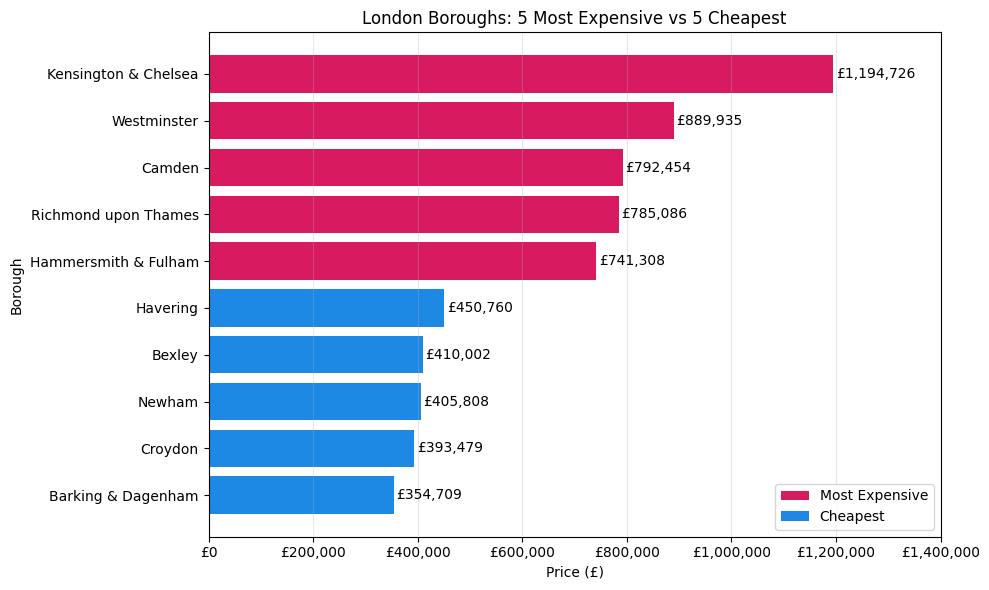

In [9]:
plt.figure(figsize=(10, 6))

# Combine the data and sort in descending order
combined_data = pd.concat([most_expensive, cheapest], ignore_index=True)
combined_data = combined_data.sort_values('Price', ascending=True)  # Sort ascending for horizontal bars

# Create color list: #D81B60 for expensive, #1E88E5 for cheap
colors = ['#1E88E5'] * 5 + ['#D81B60'] * 5  # Reversed to match sorted order

# Create horizontal bar chart
bars = plt.barh(combined_data['Borough'], combined_data['Price'], color=colors)

# Add value labels on each bar
for i, (bar, price) in enumerate(zip(bars, combined_data['Price'])):
    plt.text(bar.get_width() + 5000, bar.get_y() + bar.get_height()/2, 
             f'£{price:,.0f}', va='center', ha='left', fontsize=10)

# Add labels and title
plt.title('London Boroughs: 5 Most Expensive vs 5 Cheapest')
plt.xlabel('Price (£)')
plt.ylabel('Borough')

# Format x-axis to show full values (no scientific notation)
plt.ticklabel_format(style='plain', axis='x')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'£{x:,.0f}'))

# Set x-axis limit to 1.5 million to make room for value labels
plt.xlim(0, 1400000)

# Add grid for better readability
plt.grid(True, axis='x', alpha=0.3)

# Create custom legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#D81B60', label='Most Expensive'),
    Patch(facecolor='#1E88E5', label='Cheapest')
]
plt.legend(handles=legend_elements)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.savefig('img/boroughs_comparison.png', dpi=300)
plt.show()